In [ ]:
!pip install mglearn

# K-NN(k-Nearest Neighbors, k-최근접 이웃) 알고리즘
* k : 이웃의 개수
분류와 회귀 모두에 사용이 가능하며, **훈련된** 데이터와 가장 가까운 **k**개의 데이터 포인트 찾기.

찾아낸 k 개의 데이터 포인트 중 가장 많은 ( 또는 가장 가까운 ) 데이터 포인트의 개수 (또는 거리)를 이용해 새로운 데이터 포인트를 분류 하거나 회귀합니다.

1. 개수
2. 거리

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


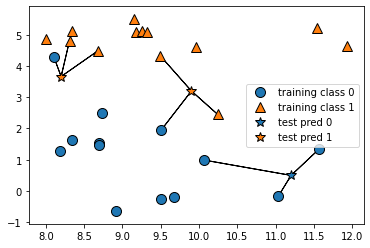

In [ ]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# 머신러닝 훈련 전에 반드시 확인해야 할 사항들
# X_train의 데이터 개수와, y_train의 데이터 개수가 맞는지를 확인
print(X_train.shape)
print(y_train.shape)

(19, 2)
(19,)


In [ ]:
# knn 모델 생성 ( 이웃의 개수 : 3 )
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier( n_neighbors=3 )

# knn의 훈련은 없다... 데이터 포인트 배치만...
knn_clf.fit(X_train, y_train)

# knn 알고리즘의 사용은 예측 시에만 사용 된다.
knn_predictions = knn_clf.predict(X_test)

print("테스트 세트에 대한 예측 : {}".format(knn_predictions))

테스트 세트에 대한 예측 : [1 0 1 0 1 0 0]


In [ ]:
# 정확도 확인하기
knn_train_score = knn_clf.score(X_train, y_train) # 훈련한 데이터에 대한 점수
knn_test_score = knn_clf.score(X_test, y_test)    # 새로운 테스트 데이터에 대한 점수

print("훈련 세트에 대한 점수 : {:.2f}".format(knn_train_score))
print("테스트 세트에 대한 점수 : {:.2f}".format(knn_test_score))

훈련 세트에 대한 점수 : 0.95
테스트 세트에 대한 점수 : 0.86


# 결정 경계 ( decision boundary )
클래스 0 또는 클래스 1로 **분류 되어질** 경계면 결정 경계라고 한다.

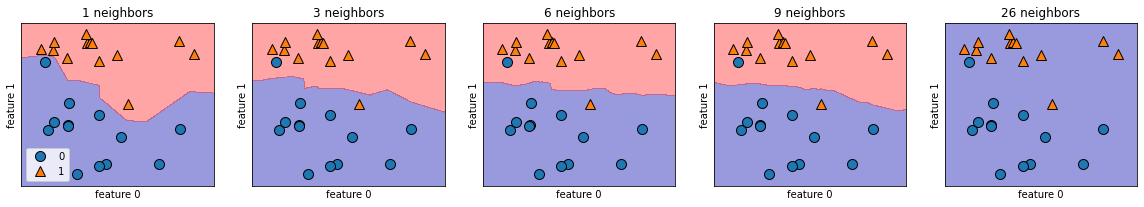

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 5, figsize=(20, 3))

for n, ax in zip([1, 3, 6, 9, 26], axes):
  clf = KNeighborsClassifier(n_neighbors = n).fit(X, y)

  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  
  ax.set_title("{} neighbors".format(n))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")

axes[0].legend(loc=3)

## 유방암 데이터 세트를 이용해서 k-NN 알아보기

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() # 유방암 데이터셋 불러오기


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target, # 계층 분할
                                                    random_state=66)

X_train.shape, y_train.shape

((426, 30), (426,))

이웃의 개수에 따라서 정확도 변화 확인

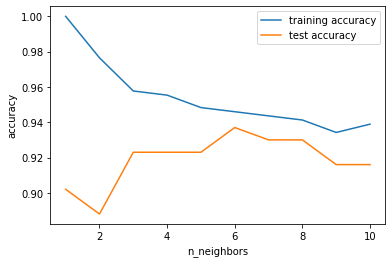

In [ ]:
training_accuracy = [] # 훈련 데이터셋에 대한 정확도 저장
test_accuracy = [] # 테스트 데이터셋에 대한 정확도 저장

neighbors_settings = range(1, 11) # 1 ~ 10개

for n in neighbors_settings:
  clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)

  # train 정확도 저장
  train_score = clf.score(X_train, y_train)

  # test 정확도 저장
  test_score = clf.score(X_test, y_test)

  training_accuracy.append(train_score)
  test_accuracy.append(test_score)

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")

plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()
plt.show()

# k-NN 회귀

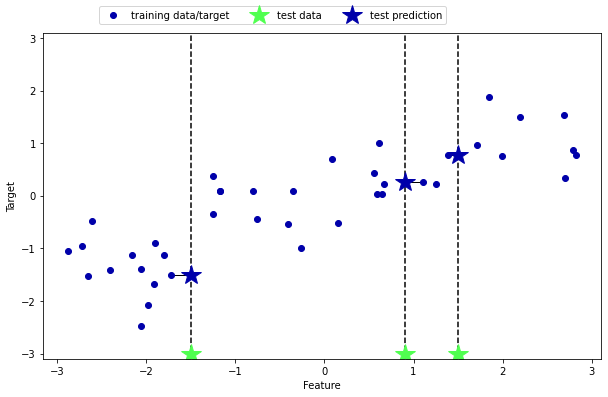

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

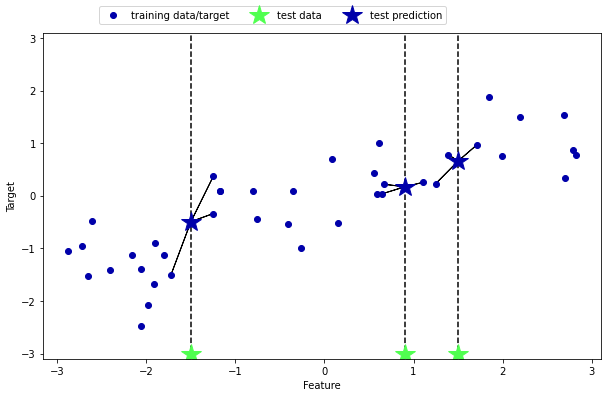

In [ ]:
# 3개로 늘리면?
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [ ]:
# k-NN 회귀 사용하기
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

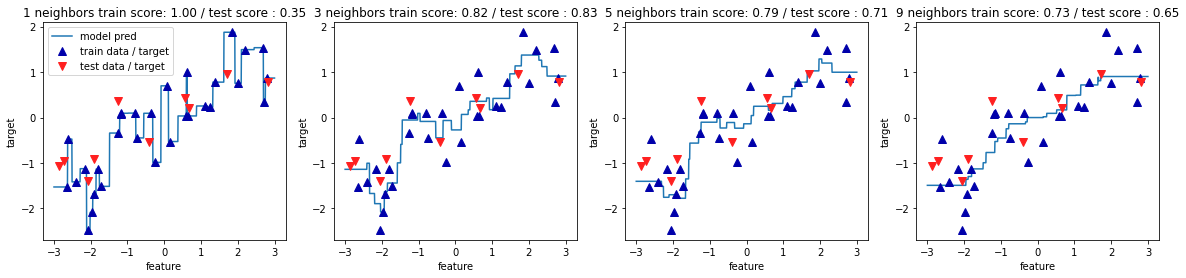

In [ ]:
import numpy as np

fig, axes = plt.subplots(1,4, figsize=(20,4))
#-3과 3 사이에 1000개의 데이터 만들기 -> 테스트 용도로 사용함
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 5, 9], axes):
    # 이웃의 개수를 1,3,9로 하여 예측하는 모델을 만듭니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line)) # 테스트 용도로 만든 데이터를 예측하고 예측 결과를 선으로 표현합니다.
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8) # 훈련 데이터를 그래프에 표시합니다.
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)   # 테스트 데이터를 그래프에 표시합니다.
    
    # 훈련 데이터의 점수와 테스트 데이터의 점수를 제목에 표현합니다.
    ax.set_title("{} neighbors train score: {:.2f} / test score : {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")

axes[0].legend(["model pred", "train data / target", "test data / target"], loc="best")